In [ ]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.1.0+cu118.html
!pip install torch_geometric
!pip install pytorch-lightning

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.utils import to_networkx
import torch_geometric.loader as loader
from torch_geometric.datasets import TUDataset
import torch_geometric.nn as gnn
import pytorch_lightning as pl
import torchmetrics
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train_size = 0.8
val_size = 0.1
test_size = 0.1

In [22]:
# this dataset contains 188 organic molecules
# nodes are atoms, edges are chemical bonds
# node features represent the type of the atom with one-hot encoding
# the 2 classes are: is the molecule mutagenic or not?
dataset = TUDataset(root='TUDataset', name='MUTAG')

# 188 graphs
print('Length of dataset: %d' % len(dataset))

dataset[0], dataset[1]

Length of dataset: 188


(Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1]),
 Data(edge_index=[2, 28], x=[13, 7], edge_attr=[28, 4], y=[1]))

This graph belongs to class 1:


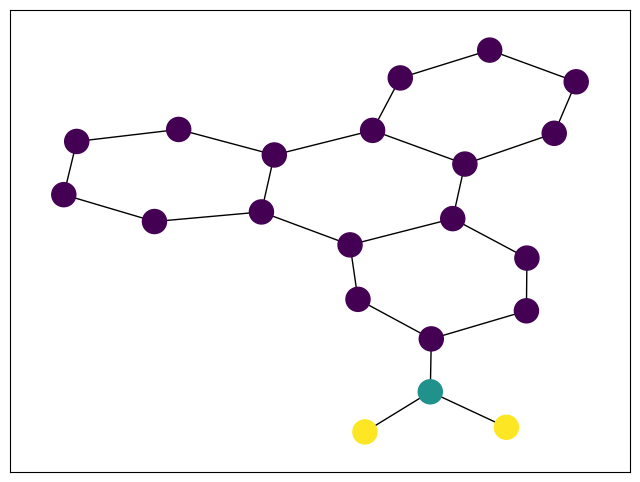

This graph belongs to class 0:


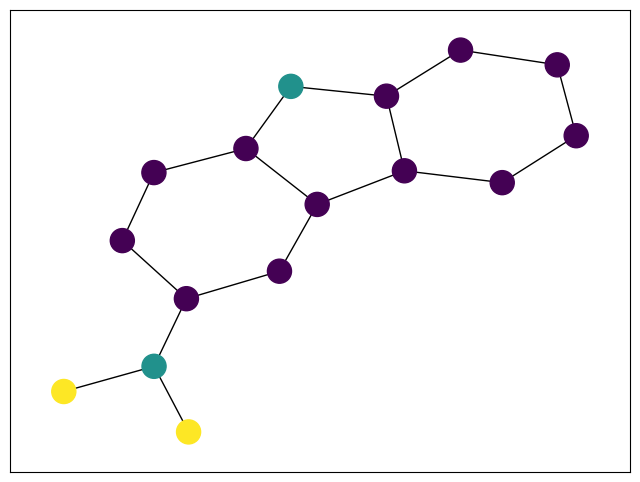

In [23]:
# graph visualization
for i in [186, 187]:
  print(f"This graph belongs to class {dataset[i].y.item()}:")
  plt.figure(figsize=(8, 6))
  G = to_networkx(dataset[i], to_undirected=True)
  layout = nx.kamada_kawai_layout(G)
  nx.draw_networkx(G, pos=layout, with_labels=False, node_color=dataset[i].x.argmax(-1).numpy())
  plt.show()

**ASSIGNMENT**

Investigate how the accuracy of the GNN varies with the number of GIN layers.

Increase the number of layers from 1 to 8.
For each case, save the best performing model into a ckpt file (*best_model_1.ckpt*, *best_model_2.ckpt*, ..., *best_model_8.ckpt*).

Additionally, save a txt file called *result.txt* with 8 lines. In the *i*-th line, you should write the accuracy of the model with *i* layers.

Ensure the size of the test set remains unchanged.
